In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import json
import numpy as np
import cufflinks as cf
import plotly.graph_objs as go
import plotly.express as px
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
#plt.style.use('ggplot')
init_notebook_mode(connected=True)
%matplotlib inline

5.3.1


In [2]:
df = pd.read_csv("../data/GBvideos_cc50_202101_procesada.csv")
df

,Unnamed: 0,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,...,comments_disabled,ratings_disabled,video_error_or_removed,description,state,lat,lon,geometry,category,publish_hour
0,0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10,"christmas|""john lewis christmas""|""john lewis""|...",7224515.0,55681.0,...,False,False,False,Click here to continue the story and make your...,Devon,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,07:38:29
1,1,3s1rvMFUweQ,2017-11-14,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.0,25561.0,...,False,False,False,Musical guest Taylor Swift performs …Ready for...,Manchester,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,06:24:44
2,2,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",981948.0,25182.0,...,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Bath And North East Somerset,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,17:00:03
3,3,PUTEiSjKwJU,2017-11-14,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13,"Salford City FC|""Salford City""|""Salford""|""Clas...",5911944.0,134520.0,...,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Aberdeen,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,02:30:38
4,4,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13,"Drake|""Nice""|""For""|""What""|""Young""|""Money""|""Hip...",5911944.0,134520.0,...,False,False,False,Dashcam captures truck's near miss with child ...,Southampton,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,01:45:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39230,38911,l884wKofd54,2018-06-14,Enrique Iglesias - MOVE TO MIAMI (Official Vid...,EnriqueIglesiasVEVO,10,2018-05-09,"Enrique Iglesias feat. Pitbull|""MOVE TO MIAMI""...",981889.0,268088.0,...,False,False,False,NEW SONG - MOVE TO MIAMI feat. Pitbull (Click ...,Plymouth,50.385386,-4.159989,POINT (-4.159989259 50.38538576),Music,07:00:01
39231,38912,IP8k2xkhOdI,2018-06-14,Jacob Sartorius - Up With It (Official Music V...,Jacob Sartorius,10,2018-05-11,"jacob sartorius|""jacob""|""up with it""|""jacob sa...",1492219.0,61998.0,...,False,False,False,THE OFFICIAL UP WITH IT MUSIC VIDEO!Get my new...,Omagh,54.600012,-7.300004,POINT (-7.300004315 54.60001223),Music,17:09:16
39232,38913,Il-an3K9pjg,2018-06-14,Anne-Marie - 2002 [Official Video],Anne-Marie,10,2018-05-08,"anne|""marie""|""anne-marie""|""2002""|""two thousand...",981889.0,25182.0,...,False,False,False,Get 2002 by Anne-Marie HERE ▶ http://ad.gt/200...,Kent,51.133712,1.300013,POINT (1.300013386 51.13371218),Music,11:05:08
39233,38914,-DRsfNObKIQ,2018-06-14,Eleni Foureira - Fuego - Cyprus - LIVE - First...,Eurovision Song Contest,24,2018-05-08,"Eurovision Song Contest|""2018""|""Lisbon""|""Cypru...",981948.0,151870.0,...,False,False,False,Eleni Foureira represented Cyprus at the first...,Glasgow,55.874405,-4.250707,POINT (-4.250707236 55.87440472),Entertainment,20:32:32


Text(0.5, 1.0, 'Categorias con más tendencia')

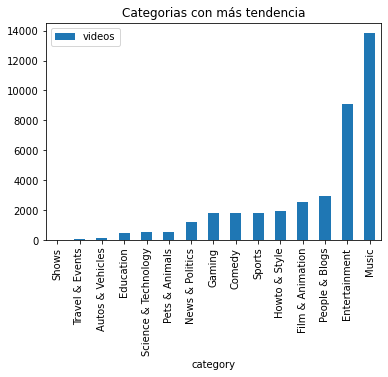

In [3]:
# ¿Qué categorías de videos son las de mayor tendencia?
dcat = df.groupby(by='category').size().reset_index(name='videos')
dcat = dcat.sort_values(by="videos")
dcat.plot.bar(x='category', y='videos')
plt.title("Categorias con más tendencia")

<AxesSubplot:title={'center':'Categorías con más Dislikes'}, xlabel='category'>

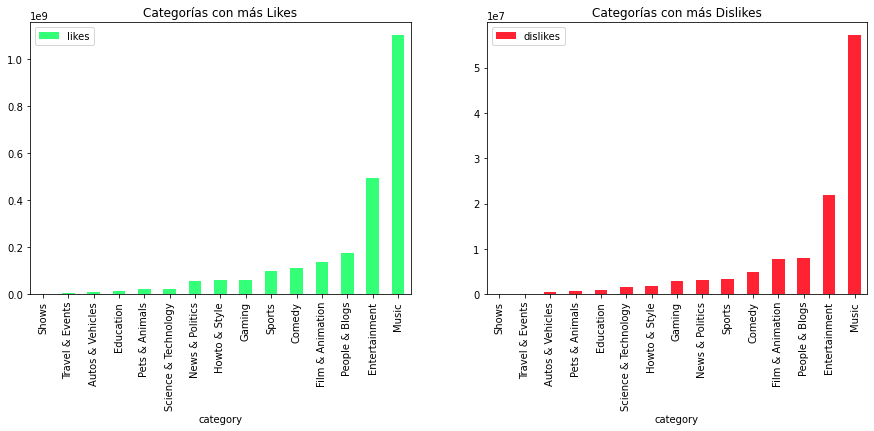

In [4]:
# ¿Qué categorías de videos son los que más gustan? ¿Y las que menos gustan?

dfc = df.copy()

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

df_like = dfc.groupby(by='category').sum()['likes'].reset_index(name='likes')
df_dislike = dfc.groupby(by='category').sum()['dislikes'].reset_index(name='dislikes')

df_like = df_like.sort_values(by='likes')
df_dislike = df_dislike.sort_values(by='dislikes')

df_like.plot.bar(x='category', y='likes', title="Categorías con más Likes", ax=ax1,color='#33ff77')
df_dislike.plot.bar(x='category', y='dislikes', title="Categorías con más Dislikes", ax=ax2,color='#ff2233')

<AxesSubplot:title={'center':'Proporción de Like/DisLike'}, xlabel='category'>

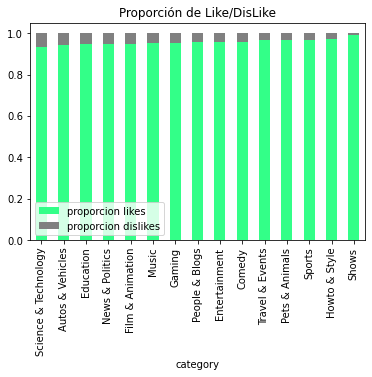

In [5]:
# ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Me gusta” / “No me gusta”?
dfc = df.copy()

d1 = dfc.groupby(by='category').sum()['likes'].reset_index(name='likes')
d2 = dfc.groupby(by='category').sum()['dislikes'].reset_index(name='dislikes')

d1['dislikes'] = d2['dislikes']

d1['proporcion likes'] = d1['likes']/(d1['likes'] + d1['dislikes'])
d1['proporcion dislikes'] = d1['dislikes']/(d1['likes'] + d1['dislikes'])


d1 = d1.sort_values(by='proporcion likes')

d1.plot.bar(x='category',
             y=['proporcion likes', 'proporcion dislikes'],
             color=['#33ff88', 'gray'],
             stacked=True,
             title="Proporción de Like/DisLike")

<AxesSubplot:title={'center':'Proporción de Vistas/comentarios'}, xlabel='category'>

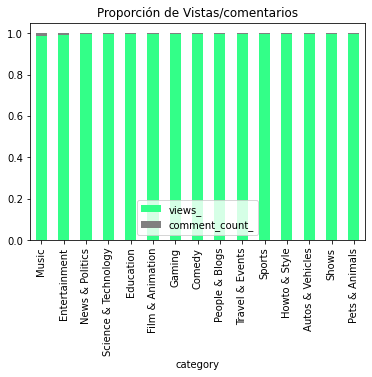

In [6]:
# ¿Qué categorías de videos tienen la mejor proporción (ratio) de “Vistas” / “Comentarios”?

dfc = df.copy()


dfc['views_'] = dfc['views'] / (dfc['comment_count']+dfc['views'])
dfc['comment_count_'] = dfc['comment_count'] / (dfc['comment_count']+dfc['views'])

dnx_ = dfc.groupby(by='category').mean()['views_'].reset_index(name='views_')
_ = dfc.groupby(by='category').mean()['comment_count_'].reset_index(name='comment_count_')
dnx_['comment_count_'] = _["comment_count_"]


dnx_ = dnx_.sort_values(by='views_')

dnx_.plot.bar(x='category', y=['views_', 'comment_count_'],
             color=['#33ff88', 'gray'],
             stacked=True,
             title="Proporción de Vistas/comentarios")

<AxesSubplot:title={'center':'Volumen de videos en tendencia por meses'}, xlabel='trending_date_short'>

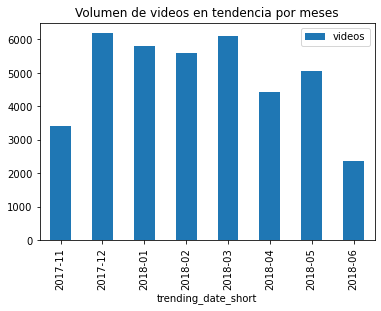

In [7]:
# ¿Cómo ha cambiado el volumen de los videos en tendencia a lo largo del tiempo?

dfc = df.copy()

def testNumbers(x):
    return float(x[0]) > 2000

dfc = dfc[dfc['trending_date'].str.split("-").map(type) == list]
dfc = dfc[dfc['trending_date'].str.split("-").map(testNumbers)]
dfc['trending_date'] = pd.to_datetime(dfc['trending_date'], format="%Y-%m-%d")

dfc['trending_date_short'] = dfc['trending_date'].map(lambda x:"%d-%02d"%(x.year,x.month))


dfx = dfc.groupby(by='trending_date_short').size().reset_index(name='videos')
dfx = dfx.sort_values(by="trending_date_short")
dfx.plot.bar(x='trending_date_short', y='videos', title="Volumen de videos en tendencia por meses")



<AxesSubplot:title={'center':'Canales menos frecuentes en tendencia'}, xlabel='channel'>

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


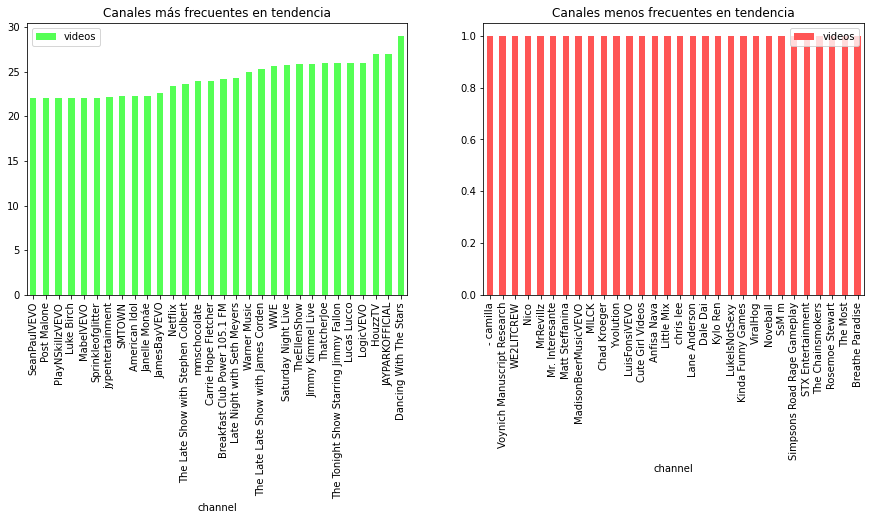

In [8]:
#¿Qué Canales de YouTube son tendencia más frecuentemente? ¿Y cuáles con menos frecuencia?

dfc = df.copy()

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

def testNumbers(x):
    return float(x[0]) > 2000

dfc = dfc[dfc['trending_date'].str.split("-").map(type) == list]
dfc = dfc[dfc['trending_date'].str.split("-").map(testNumbers)]
dfc['trending_date'] = pd.to_datetime(dfc['trending_date'], format="%Y-%m-%d")

dfc['trending_date_short'] = dfc['trending_date'].map(lambda x:"%d-%02d"%(x.year,x.month))

dfc['channel_date'] = dfc['trending_date_short'] + "¶" + dfc['channel_title']

dfx = dfc.groupby(by='channel_date').size().reset_index(name='videos')

date, channel = zip(*dfx['channel_date'].str.split('¶'))
dfx['date'] = date
dfx['channel'] = channel

plt.rcParams['font.sans-serif']=['SimHei']

dfx = dfx.groupby(by='channel').mean()['videos'].reset_index(name='videos')
dfx = dfx.sort_values(by="videos")
dfx.tail(30).plot.bar(x='channel', y='videos', ax=ax1, color="#55ff55", title="Canales más frecuentes en tendencia")
dfx.head(30).plot.bar(x='channel', y='videos', ax=ax2, color="#ff5555", title="Canales menos frecuentes en tendencia")

In [ ]:
# ¿En qué Estados se presenta el mayor número de “Vistas”, “Me gusta” y “No me gusta”? 
with open("../data/lad.json") as f:
    GB_regions_geo = json.loads(f.read())
    
dfc = dfc.copy()

dfs = [None]*3

for clm in ('likes', 'dislikes', 'views'):
    df_like = dfc.groupby(by='state').sum()[clm].reset_index(name=clm)
    
    fig = px.choropleth(data_frame=dfc,
                   geojson=GB_regions_geo,
                   locations="state",
                   featureidkey="properties.LAD13NM",
                   color=clm,
                    color_continuous_scale="burg"
                   )
    fig.update_geos(showcountries=True, fitbounds="locations")
    fig.update_layout(title_text = "Estados con mayor número de " + clm)
    fig.show()

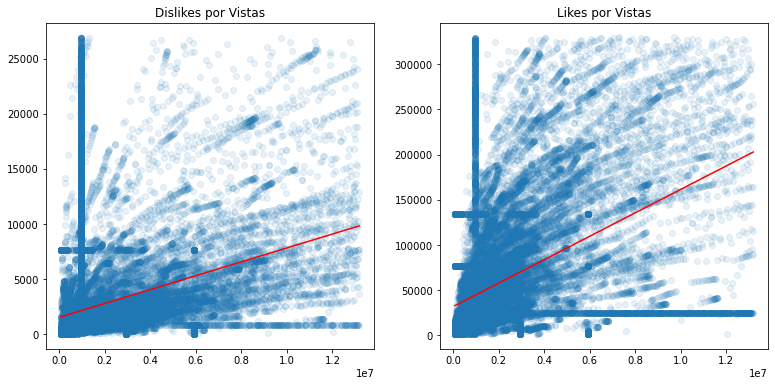

In [9]:
# ¿Es factible predecir el número de “Vistas” o “Me gusta” o “No me gusta”?
dfc = df.copy()

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

dfc = dfc[dfc['views'].notnull()]
dfc = dfc[dfc['likes'].notnull()]
dfc = dfc[dfc['dislikes'].notnull()]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(20, 6))

for yd, d, name in [['dislikes', 131, "Dislikes"], ['likes', 132, "Likes"]]:
    x = dfc['views'].values
    y = dfc[yd].values
    a, b = x.min(), x.max()
    plt.subplot(d)
    plt.scatter(x, y, alpha=0.1)
    x = np.array([ np.ones(len(x)), x]).T
    B = np.linalg.inv(x.T @ x) @ x.T @ y
    plt.plot([a, b], [B[0] + B[1] * a, B[0] + B[1]* b], c="red")
    plt.title(name + ' por Vistas')
plt.show()